In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.columns= ['Id','SepalLength','SepalWidth','PetalLength','PetalWidth','Species']

In [4]:
iris.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.data_types

AttributeError: 'DataFrame' object has no attribute 'data_types'

In [6]:
iris.dtypes

Id               int64
SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species         object
dtype: object

In [7]:
iris['count'] =1
iris[['Species','count']].groupby('Species').count()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [8]:
%matplotlib inline
def plot_iris(iris, col1,col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x = col1, y = col2, data = iris, hue = "Species", fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("Iris species shown by color")
    plt.show()
    

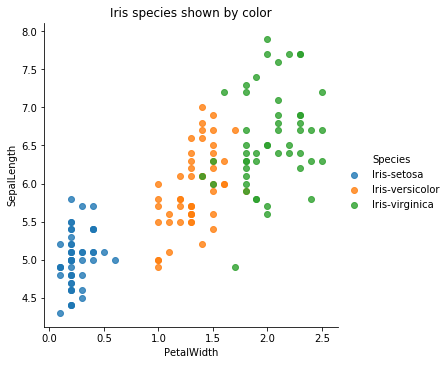

In [9]:
plot_iris(iris, 'PetalWidth','SepalLength')

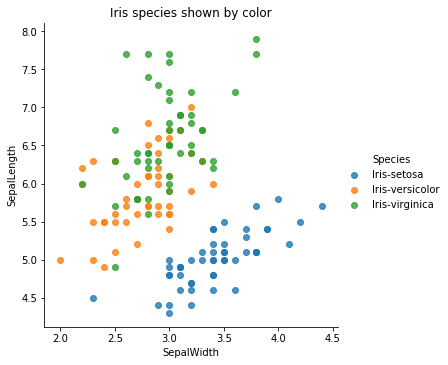

In [10]:
plot_iris(iris,'SepalWidth','SepalLength')

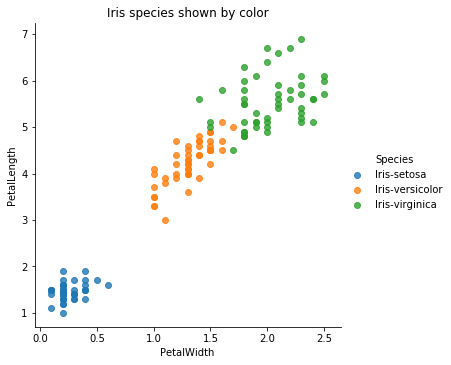

In [11]:
plot_iris(iris, 'PetalWidth','PetalLength')

In [12]:
from sklearn.preprocessing import scale
num_cols= ['SepalLength','SepalWidth','PetalLength','PetalWidth']
iris_scaled = scale(iris[num_cols])
iris_scaled1 = pd.DataFrame(iris_scaled,columns= num_cols)

In [13]:
print(iris_scaled1.describe().round(3)) #demeaned and  variance-scaled data

       SepalLength  SepalWidth  PetalLength  PetalWidth
count      150.000     150.000      150.000     150.000
mean        -0.000      -0.000        0.000       0.000
std          1.003       1.003        1.003       1.003
min         -1.870      -2.439       -1.569      -1.444
25%         -0.901      -0.588       -1.228      -1.182
50%         -0.053      -0.125        0.336       0.133
75%          0.675       0.569        0.763       0.791
max          2.492       3.115        1.786       1.711


In [14]:
iris['count'] =1
iris[['Species','count']].groupby('Species').count()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [28]:

levels = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [29]:
iris_scaled1['Species'] = [levels[x] for x in iris['Species']]
iris_scaled1.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


In [31]:
""""for x in iris['Species']:
    if x == 'Iris-setosa':
        iris_scaled1['Species']=0
    if x == 'Iris-versicolor':
        iris_scaled['Species']=int(1)
    if x == 'Iris-virginica':
        iris_scaled['Species']=int(0)"""

'"for x in iris[\'Species\']:\n    if x == \'Iris-setosa\':\n        iris_scaled1[\'Species\']=0\n    if x == \'Iris-versicolor\':\n        iris_scaled[\'Species\']=int(1)\n    if x == \'Iris-virginica\':\n        iris_scaled[\'Species\']=int(0)'

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np

In [33]:
np.random.seed(3456) #np.ravel is used to get a 1-D array

In [36]:
# splitting the data into a training and test set by bernoulli sampling
iris_split = train_test_split(np.asmatrix(iris_scaled1), test_size = 75)
iris_train_features = iris_split[0][:,:4]
iris_train_labels = np.ravel(iris_split[0][:,4])
iris_test_features = iris_split[1][:,:4]
iris_test_labels = np.ravel(iris_split[1][:,4])

In [37]:
print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

(75, 4)
(75,)
(75, 4)
(75,)


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_mod = KNeighborsClassifier(n_neighbors = 3) #defining a model object
knn_mod.fit(iris_train_features, iris_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [51]:
print(num_cols)

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']


In [47]:
iris_test = pd.DataFrame(iris_test_features, columns = num_cols)
iris_test['predicted'] = knn_mod.predict(iris_test_features)
iris_test['correct'] = [ 1 if x== z else 0 for x,z in zip(iris_test['predicted'], iris_test_labels)]
accuracy = 100.0* float(sum(iris_test['correct']))/ float(iris_test.shape[0])

In [52]:
print(iris_test['predicted'])

0     0.0
1     2.0
2     1.0
3     0.0
4     2.0
5     0.0
6     0.0
7     2.0
8     1.0
9     1.0
10    0.0
11    1.0
12    1.0
13    0.0
14    1.0
15    1.0
16    2.0
17    2.0
18    1.0
19    1.0
20    1.0
21    2.0
22    0.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    0.0
29    1.0
     ... 
45    2.0
46    2.0
47    0.0
48    0.0
49    1.0
50    0.0
51    1.0
52    0.0
53    1.0
54    0.0
55    2.0
56    1.0
57    2.0
58    1.0
59    0.0
60    0.0
61    1.0
62    0.0
63    0.0
64    0.0
65    1.0
66    1.0
67    0.0
68    2.0
69    0.0
70    0.0
71    2.0
72    2.0
73    2.0
74    2.0
Name: predicted, dtype: float64


In [48]:
print(accuracy)

97.33333333333333


In [73]:
# plotting how many predicted and actual values overlap
import matplotlib.pyplot as plt
import seaborn as sns
levels = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
iris_test['Species'] = [levels[x] for x in iris_test['predicted']]
markers = {1:'^', 0:'o'}
colors = { 'Iris-setosa':'blue','Iris-versicolor':'green','Iris-virginica':'red'}
def plot_shap(df,col1, col2,markers, colors):
    ax = plt.figure(figsize= (6,6)).gca() # to define the plot axis
    for m in markers :
        for c in colors:
            df_temp = df[(df['correct']==m) & (df['Species'] ==c)]
            sns.regplot(x=col1, y = col2,
                        data = df_temp,
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]}, 
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('iris species by color')
    return 'Done'

'Done'

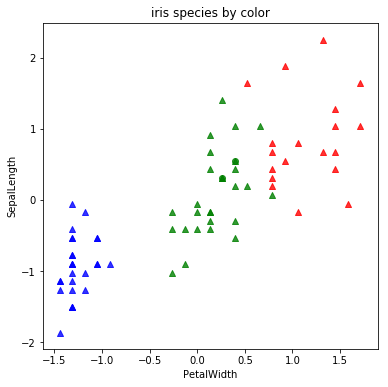

In [74]:
plot_shap(iris_test, 'PetalWidth','SepalLength', markers, colors)

'Done'

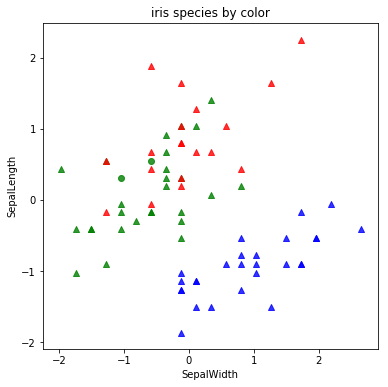

In [77]:
plot_shap(iris_test, 'SepalWidth','SepalLength',markers, colors)